In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Import Data Transformation Libraries
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle

In [2]:
df = pd.read_csv("appliancesloadm.csv")
df.tail()

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
487246,26/12/2013 16:07,355,1,5,0,0,0,0,0,0,0
487247,26/12/2013 16:08,358,1,5,0,0,0,0,0,0,0
487248,26/12/2013 16:08,322,1,25,0,0,0,0,0,0,0
487249,26/12/2013 16:08,280,1,25,0,0,0,0,0,0,0
487250,26/12/2013 16:08,280,1,18,0,0,0,0,0,0,0


In [3]:
df.loc[[520, 521, 10000]]

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
520,17/09/2013 23:00,62,1,0,0,0,0,0,0,0,0
521,17/09/2013 23:00,60,1,0,0,0,0,0,0,0,0
10000,18/09/2013 15:31,277,166,0,0,0,0,0,0,0,0


In [4]:
#Separation of time from date
df['Date'] = pd.to_datetime(df['Time']).dt.date
df['Time'] = pd.to_datetime(df['Time']).dt.time

In [5]:
#Checking the Splitting
df

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date
0,22:08:00,695,88,0,0,0,0,0,0,0,0,2013-09-17
1,22:08:00,694,88,0,0,0,0,0,0,0,0,2013-09-17
2,22:08:00,694,88,0,0,0,0,0,0,0,0,2013-09-17
3,22:08:00,702,88,0,0,0,0,0,0,0,0,2013-09-17
4,22:08:00,700,88,0,0,0,0,0,0,0,0,2013-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...
487246,16:07:00,355,1,5,0,0,0,0,0,0,0,2013-12-26
487247,16:08:00,358,1,5,0,0,0,0,0,0,0,2013-12-26
487248,16:08:00,322,1,25,0,0,0,0,0,0,0,2013-12-26
487249,16:08:00,280,1,25,0,0,0,0,0,0,0,2013-12-26


In [6]:
#Move the Date from last position to first
df1 = df.iloc[:, [11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
df1

,Date,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,2013-09-17,22:08:00,695,88,0,0,0,0,0,0,0,0
1,2013-09-17,22:08:00,694,88,0,0,0,0,0,0,0,0
2,2013-09-17,22:08:00,694,88,0,0,0,0,0,0,0,0
3,2013-09-17,22:08:00,702,88,0,0,0,0,0,0,0,0
4,2013-09-17,22:08:00,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26,16:07:00,355,1,5,0,0,0,0,0,0,0
487247,2013-12-26,16:08:00,358,1,5,0,0,0,0,0,0,0
487248,2013-12-26,16:08:00,322,1,25,0,0,0,0,0,0,0
487249,2013-12-26,16:08:00,280,1,25,0,0,0,0,0,0,0


In [7]:
#Processing Date into Year, Month and Day
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1

C:\Users\user\AppData\Local\Temp\ipykernel_9076\1531986716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.to_datetime(df1['Date']).dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_9076\1531986716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.to_datetime(df1['Date']).dt.month
C:\Users\user\AppData\Local\Temp\ipykernel_9076\1531986716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Date,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Year,Month,Day
0,2013-09-17,22:08:00,695,88,0,0,0,0,0,0,0,0,2013,9,17
1,2013-09-17,22:08:00,694,88,0,0,0,0,0,0,0,0,2013,9,17
2,2013-09-17,22:08:00,694,88,0,0,0,0,0,0,0,0,2013,9,17
3,2013-09-17,22:08:00,702,88,0,0,0,0,0,0,0,0,2013,9,17
4,2013-09-17,22:08:00,700,88,0,0,0,0,0,0,0,0,2013,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26,16:07:00,355,1,5,0,0,0,0,0,0,0,2013,12,26
487247,2013-12-26,16:08:00,358,1,5,0,0,0,0,0,0,0,2013,12,26
487248,2013-12-26,16:08:00,322,1,25,0,0,0,0,0,0,0,2013,12,26
487249,2013-12-26,16:08:00,280,1,25,0,0,0,0,0,0,0,2013,12,26


In [8]:
#Processing Time into Hour, Minute and displaying the new datase that now contains the splits
df1['Hour'] = pd.to_datetime(df1['Time'], format = '%H:%M:%S').dt.hour
df1['Minute'] = pd.to_datetime(df1['Time'], format = '%H:%M:%S').dt.minute
df1['Second'] = pd.to_datetime(df1['Time'], format = '%H:%M:%S').dt.second
df1

C:\Users\user\AppData\Local\Temp\ipykernel_9076\2237595617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hour'] = pd.to_datetime(df1['Time'], format = '%H:%M:%S').dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_9076\2237595617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Minute'] = pd.to_datetime(df1['Time'], format = '%H:%M:%S').dt.minute
C:\Users\user\AppData\Local\Temp\ipykernel_9076\2237595617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,Date,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Year,Month,Day,Hour,Minute,Second
0,2013-09-17,22:08:00,695,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,0
1,2013-09-17,22:08:00,694,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,0
2,2013-09-17,22:08:00,694,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,0
3,2013-09-17,22:08:00,702,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,0
4,2013-09-17,22:08:00,700,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26,16:07:00,355,1,5,0,0,0,0,0,0,0,2013,12,26,16,7,0
487247,2013-12-26,16:08:00,358,1,5,0,0,0,0,0,0,0,2013,12,26,16,8,0
487248,2013-12-26,16:08:00,322,1,25,0,0,0,0,0,0,0,2013,12,26,16,8,0
487249,2013-12-26,16:08:00,280,1,25,0,0,0,0,0,0,0,2013,12,26,16,8,0


In [9]:
#Excluding the columns of orginal date and time in the df1 dataset
main = df1.iloc[:, [12, 13, 14, 15, 16, 17, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
main

,Year,Month,Day,Hour,Minute,Second,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,2013,9,17,22,8,0,695,88,0,0,0,0,0,0,0,0
1,2013,9,17,22,8,0,694,88,0,0,0,0,0,0,0,0
2,2013,9,17,22,8,0,694,88,0,0,0,0,0,0,0,0
3,2013,9,17,22,8,0,702,88,0,0,0,0,0,0,0,0
4,2013,9,17,22,8,0,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013,12,26,16,7,0,355,1,5,0,0,0,0,0,0,0
487247,2013,12,26,16,8,0,358,1,5,0,0,0,0,0,0,0
487248,2013,12,26,16,8,0,322,1,25,0,0,0,0,0,0,0
487249,2013,12,26,16,8,0,280,1,25,0,0,0,0,0,0,0


In [10]:
#Setting Month as index
main1 = main.set_index(['Month'])

In [11]:
#Changing month to read Jan-Dec
main2 = main1.rename(index = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun',
                                  7 : 'Jul', 8 : 'Aug', 9 : 'Sept', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

In [12]:
main3 = main2.reset_index()

In [13]:
main3

,Month,Year,Day,Hour,Minute,Second,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,Sept,2013,17,22,8,0,695,88,0,0,0,0,0,0,0,0
1,Sept,2013,17,22,8,0,694,88,0,0,0,0,0,0,0,0
2,Sept,2013,17,22,8,0,694,88,0,0,0,0,0,0,0,0
3,Sept,2013,17,22,8,0,702,88,0,0,0,0,0,0,0,0
4,Sept,2013,17,22,8,0,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,Dec,2013,26,16,7,0,355,1,5,0,0,0,0,0,0,0
487247,Dec,2013,26,16,8,0,358,1,5,0,0,0,0,0,0,0
487248,Dec,2013,26,16,8,0,322,1,25,0,0,0,0,0,0,0
487249,Dec,2013,26,16,8,0,280,1,25,0,0,0,0,0,0,0


In [14]:
wm = main3.drop(['Year', 'Second', 'Aggregate'], axis = 1)
wm

,Month,Day,Hour,Minute,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,Sept,17,22,8,88,0,0,0,0,0,0,0,0
1,Sept,17,22,8,88,0,0,0,0,0,0,0,0
2,Sept,17,22,8,88,0,0,0,0,0,0,0,0
3,Sept,17,22,8,88,0,0,0,0,0,0,0,0
4,Sept,17,22,8,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,Dec,26,16,7,1,5,0,0,0,0,0,0,0
487247,Dec,26,16,8,1,5,0,0,0,0,0,0,0
487248,Dec,26,16,8,1,25,0,0,0,0,0,0,0
487249,Dec,26,16,8,1,25,0,0,0,0,0,0,0


In [15]:
# Different applicances in different hours of a day
by_hours_wm = wm.groupby('Hour').mean()

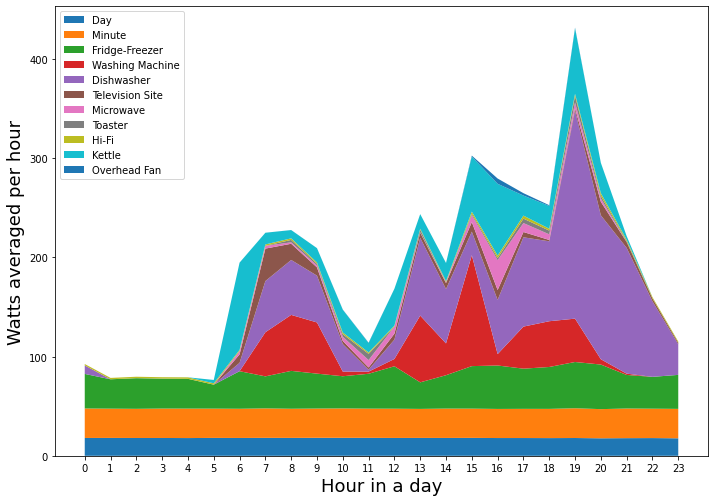

In [16]:
# Set size of plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# Stackplot
ax.stackplot(list(range(24)), np.transpose(by_hours_wm.values), labels=by_hours_wm.columns.values)
plt.xlabel('Hour in a day', fontsize=18)
plt.ylabel('Watts averaged per hour', fontsize=18)
plt.xticks(np.arange(0, 24, 1.0))
ax.legend(loc=2)

fig.savefig('Stackplot.jpg')

In [17]:
# Different applicances in different hours of a day
by_day_wm = wm.groupby('Day').mean()

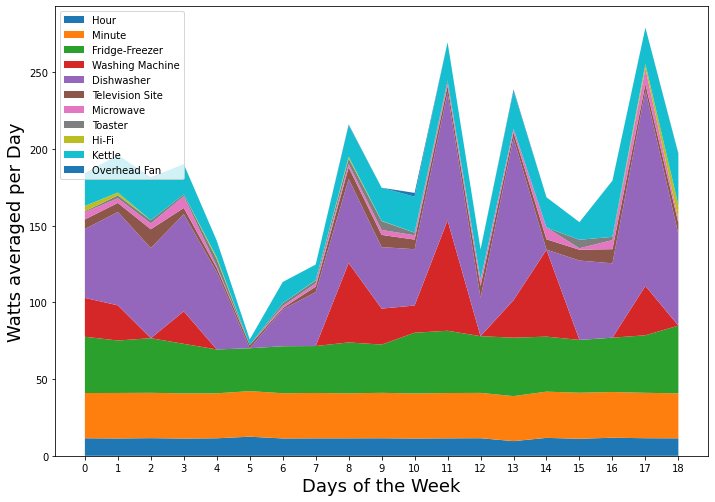

In [18]:
# Set size of plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# Stackplot
ax.stackplot(list(range(19)), np.transpose(by_day_wm.values), labels=by_day_wm.columns.values)
plt.xlabel('Days of the Week', fontsize=18)
plt.ylabel('Watts averaged per Day', fontsize=18)
plt.xticks(np.arange(0, 19, 1.0))
ax.legend(loc=2)

fig.savefig('Day_Stackplot.jpg')

Text(0.5, 1.0, 'Overhead Fan')

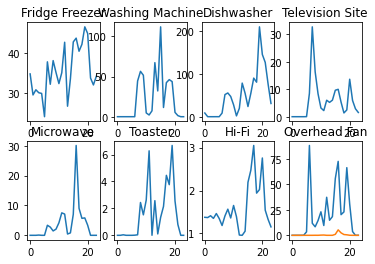

In [19]:
plt.subplot(241)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Fridge-Freezer'].values)
plt.title('Fridge Freezer')

plt.subplot(242)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Washing Machine'].values)
plt.title('Washing Machine')

plt.subplot(243)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Dishwasher'].values)
plt.title('Dishwasher')

plt.subplot(244)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Television Site'].values)
plt.title('Television Site')

plt.subplot(245)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Microwave'].values)
plt.title('Microwave')

plt.subplot(246)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Toaster'].values)
plt.title('Toaster')

plt.subplot(247)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Hi-Fi'].values)
plt.title('Hi-Fi')

plt.subplot(248)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Kettle'].values)
plt.title('Kettle')

plt.subplot(248)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_wm['Overhead Fan'].values)
plt.title('Overhead Fan')

In [20]:
wm1 = wm.groupby('Month')
wm1.mean()

,Day,Hour,Minute,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
Month,,,,,,,,,,,,
Apr,10.000000,11.579187,29.550755,33.985784,22.842105,0.000000,6.395735,4.369619,0.234486,0.670633,11.209009,0.791311
Aug,10.000000,11.569170,29.698102,35.245783,0.000000,47.368067,5.612958,3.611742,2.425965,11.556439,14.918910,0.000487
Dec,11.500397,11.669624,29.206160,38.988963,17.112313,55.152925,6.047537,3.160283,1.792974,0.766140,36.937099,0.300873
Feb,10.000000,11.421962,29.375054,31.859203,54.836927,43.267385,5.191989,4.064044,0.000000,0.000000,22.186848,0.000000
Jan,10.000000,11.497032,29.541448,33.773169,54.468678,0.286053,4.934772,4.439556,0.116489,4.779244,25.464418,0.000000
Jul,10.000000,11.118810,29.651260,42.345445,32.006199,50.875540,8.057129,7.794554,1.190536,6.670486,19.305344,0.000000
Jun,10.000000,11.527767,29.449203,38.450589,49.978202,57.531002,2.156666,2.542633,0.000000,1.412308,19.748363,4.028961
Mar,10.000000,11.201896,29.583570,39.880648,0.000000,56.286098,6.922749,1.047867,0.000000,0.549131,19.147472,0.371406
May,10.000000,11.406782,29.466841,38.748514,0.000000,46.329213,7.552650,3.668568,0.011251,10.435940,9.894541,0.005071


Text(0.5, 1.0, 'Appliances Monthly Average Consumption')

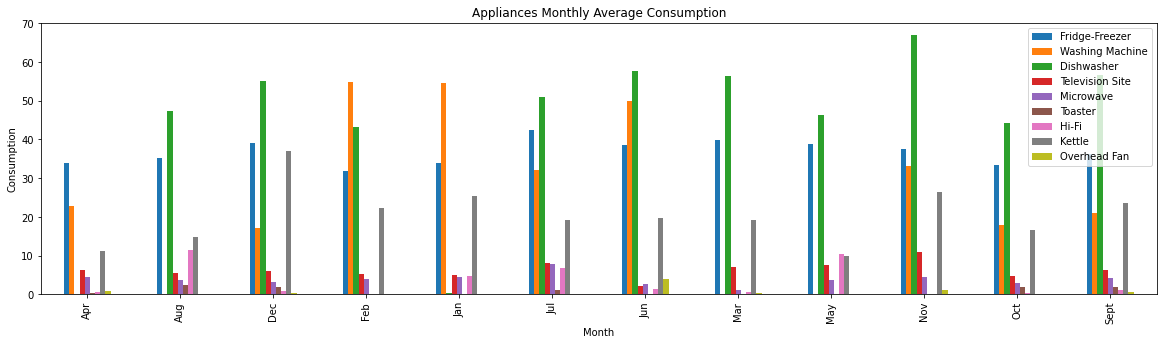

In [75]:
wm1[['Fridge-Freezer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Microwave', 'Toaster', 'Hi-Fi', 'Kettle', 'Overhead Fan']].mean().plot(kind = 'bar', figsize = (20,5))
plt.ylabel('Consumption')
plt.xlabel('Month')
plt.title('Appliances Monthly Average Consumption')


In [22]:
wm1.sum()

,Day,Hour,Minute,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
Month,,,,,,,,,,,,
Apr,125210,144983,370005,425536,286006,0,80081,54712,2936,8397,140348,9908
Aug,123320,142671,366237,434651,0,584143,69219,44540,29917,142514,183980,6
Dec,159430,161776,404885,540504,237228,764585,83837,43811,24856,10621,512059,4171
Feb,140060,159976,411427,446220,768046,606003,72719,56921,0,0,310749,0
Jan,143190,164626,423004,483598,779937,4096,70661,63570,1668,68434,364625,0
Jul,127430,141687,377846,539608,407855,648307,102672,99326,15171,85002,246008,0
Jun,129830,149665,382339,499204,648867,746925,28000,33011,0,18336,256393,52308
Mar,126600,141816,374528,504889,0,712582,87642,13266,0,6952,242407,4702
May,126210,143965,371901,489045,0,584721,95322,46301,142,131712,124879,64


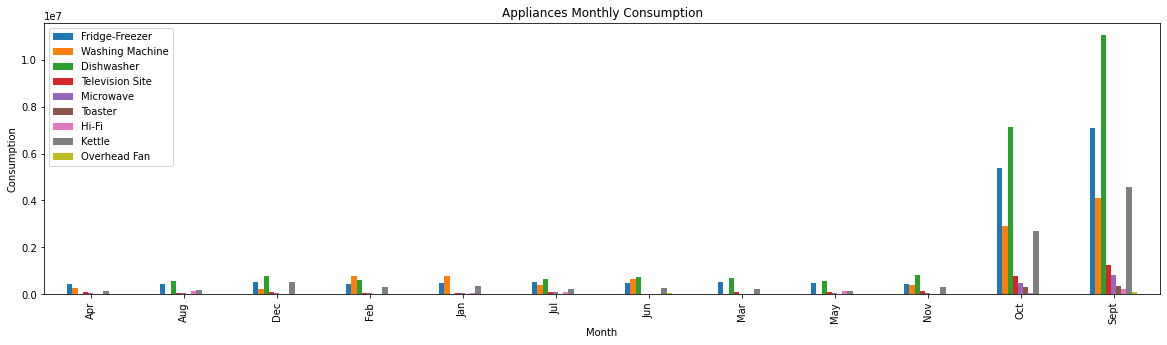

In [23]:
wm1[['Fridge-Freezer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Microwave', 'Toaster', 'Hi-Fi', 'Kettle', 'Overhead Fan']].sum().plot(kind = 'bar', figsize = (20,5))
plt.ylabel('Consumption')
plt.xlabel('Month')
plt.title('Appliances Monthly Consumption')

fig.savefig('Barsum.jpg')

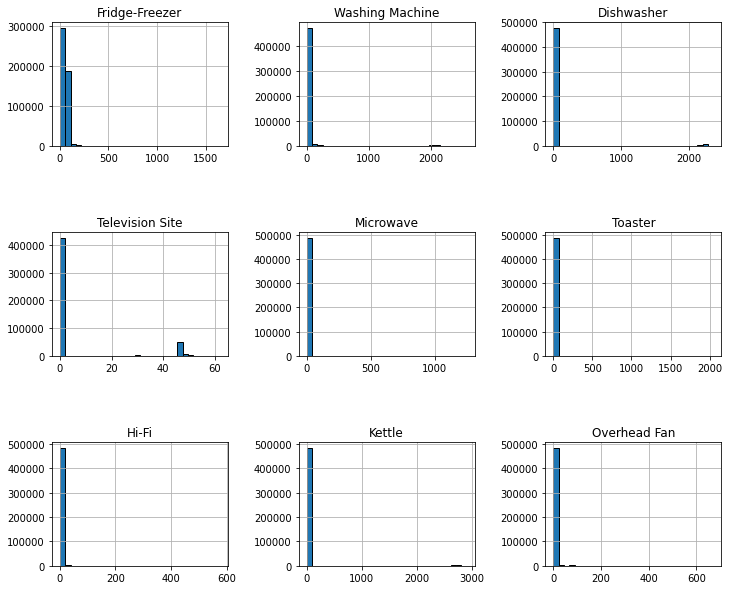

In [24]:
#Checking the distribution of all variables
wm[['Fridge-Freezer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Microwave', 'Toaster', 'Hi-Fi', 'Kettle', 'Overhead Fan']].hist(figsize=(12, 10), bins=30, edgecolor="black",)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [25]:
#Describing the features
wm1[['Fridge-Freezer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Microwave', 'Toaster', 'Hi-Fi', 'Kettle', 'Overhead Fan']].describe()

Fridge-Freezer                                                     \
               count       mean        std  min  25%  50%   75%     max   
Month                                                                     
Apr          12521.0  33.985784  45.738940  1.0  1.0  1.0  83.0  1396.0   
Aug          12332.0  35.245783  41.696009  1.0  1.0  1.0  84.0   224.0   
Dec          13863.0  38.988963  47.838177  1.0  1.0  1.0  84.0  1442.0   
Feb          14006.0  31.859203  40.965689  1.0  1.0  1.0  83.0   511.0   
Jan          14319.0  33.773169  43.263743  1.0  1.0  1.0  84.0   417.0   
Jul          12743.0  42.345445  49.543199  1.0  1.0  1.0  84.0  1501.0   
Jun          12983.0  38.450589  46.204216  1.0  1.0  1.0  84.0  1567.0   
Mar          12660.0  39.880648  49.366646  1.0  1.0  1.0  84.0  1328.0   
May          12621.0  38.748514  44.272218  1.0  1.0  1.0  85.0   169.0   
Nov          12274.0  37.485579  45.792255  1.0  1.0  1.0  84.0  1616.0   
Oct         162051.0  33.306768  44.201975  0.0  1.0  1.0  84.0  1647.0   
Sept        194878.0  36.337729  46.005598  0.0  1.0  1.0  84.0  1628.0   

      Washing Machine             ... Kettle         Overhead Fan            \
                count       mean  ...    75%     max        count      mean   
Month                             ...                                         
Apr           12521.0  22.842105  ...    0.0  2827.0      12521.0  0.791311   
Aug           12332.0   0.000000  ...    0.0  2833.0      12332.0  0.000487   
Dec           13863.0  17.112313  ...    0.0  2872.0      13863.0  0.300873   
Feb           14006.0  54.836927  ...    0.0  2814.0      14006.0  0.000000   
Jan           14319.0  54.468678  ...    0.0  2814.0      14319.0  0.000000   
Jul           12743.0  32.006199  ...    0.0  2795.0      12743.0  0.000000   
Jun           12983.0  49.978202  ...    0.0  2808.0      12983.0  4.028961   
Mar           12660.0   0.000000  ...    0.0  2879.0      12660.0  0.371406   
May           12621.0   0.000000  ...    0.0  2814.0      12621.0  0.005071   
Nov           12274.0  33.147222  ...    0.0  2820.0      12274.0  1.161805   
Oct          162051.0  18.012138  ...    0.0  2905.0     162051.0  0.161523   
Sept         194878.0  20.984052  ...    0.0  2899.0     194878.0  0.496582   

                                             
             std  min  25%  50%  75%    max  
Month                                        
Apr     7.347891  0.0  0.0  0.0  0.0  102.0  
Aug     0.031192  0.0  0.0  0.0  0.0    2.0  
Dec     4.600942  0.0  0.0  0.0  0.0   73.0  
Feb     0.000000  0.0  0.0  0.0  0.0    0.0  
Jan     0.000000  0.0  0.0  0.0  0.0    0.0  
Jul     0.000000  0.0  0.0  0.0  0.0    0.0  
Jun    12.829917  0.0  0.0  0.0  0.0   75.0  
Mar     7.864670  0.0  0.0  0.0  0.0  512.0  
May     0.402811  0.0  0.0  0.0  0.0   32.0  
Nov    12.069851  0.0  0.0  0.0  0.0  672.0  
Oct     3.337242  0.0  0.0  0.0  0.0   83.0  
Sept    5.311329  0.0  0.0  0.0  0.0  128.0  

[12 rows x 72 columns]

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fridge-Freezer'>

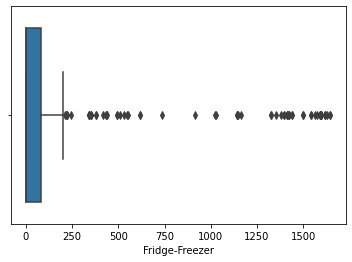

In [26]:
sns.boxplot(wm['Fridge-Freezer'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Washing Machine'>

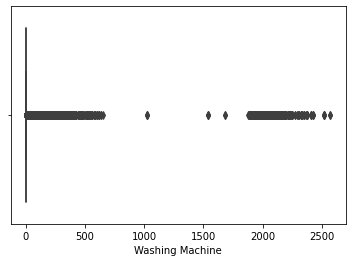

In [27]:
sns.boxplot(wm['Washing Machine'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dishwasher'>

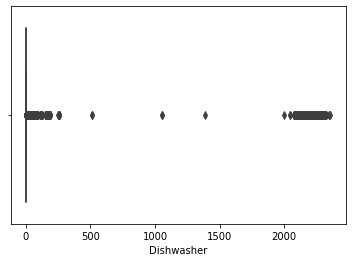

In [28]:
sns.boxplot(wm['Dishwasher'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Television Site'>

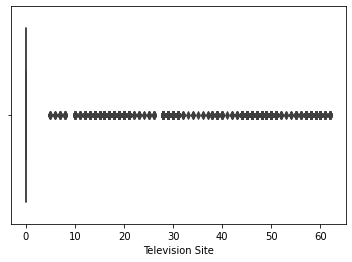

In [29]:
sns.boxplot(wm['Television Site'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Microwave'>

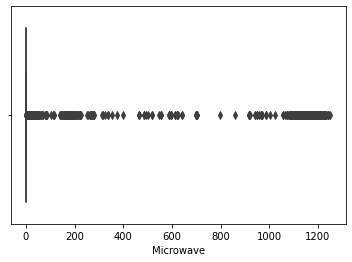

In [30]:
sns.boxplot(wm['Microwave'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Toaster'>

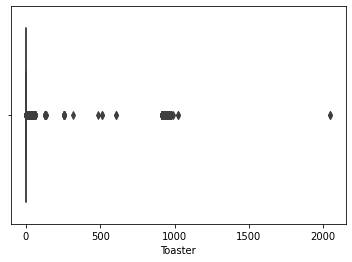

In [31]:
sns.boxplot(wm['Toaster'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hi-Fi'>

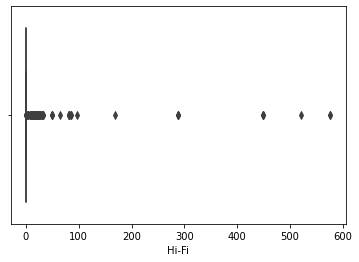

In [32]:
sns.boxplot(wm['Hi-Fi'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kettle'>

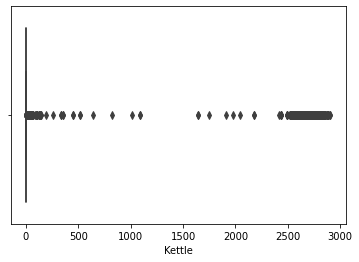

In [33]:
sns.boxplot(wm['Kettle'])

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overhead Fan'>

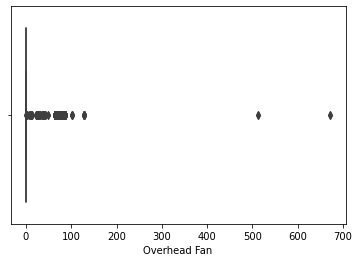

In [34]:
sns.boxplot(wm['Overhead Fan'])

In [35]:
#Create a dataset named model from the original dataset(i.e. Main) for the Machine Learning since Month original have numerical values
model = main.drop(['Year', 'Second', 'Aggregate'], axis = 1)
model

,Month,Day,Hour,Minute,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,9,17,22,8,88,0,0,0,0,0,0,0,0
1,9,17,22,8,88,0,0,0,0,0,0,0,0
2,9,17,22,8,88,0,0,0,0,0,0,0,0
3,9,17,22,8,88,0,0,0,0,0,0,0,0
4,9,17,22,8,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,12,26,16,7,1,5,0,0,0,0,0,0,0
487247,12,26,16,8,1,5,0,0,0,0,0,0,0
487248,12,26,16,8,1,25,0,0,0,0,0,0,0
487249,12,26,16,8,1,25,0,0,0,0,0,0,0


In [36]:
def find_boundaries(model, variable, distance):
    IQR = model[variable].quantile(0.75) - model[variable].quantile(0.25)
    lower_boundary = model[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = model[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [37]:
#Calculate and then display the IQR proximity rule boundaries for the Fridge-Freezer variable:
#Values below or above the upper and lower boundary by 1.5
FF_upper_limit, FF_lower_limit = find_boundaries(model, 'Dishwasher', 1.5)

In [38]:
#Now, we need to find the outliers in the dataframe.
#Create a boolean vector to flag observations outside the boundaries we determined:
outliers_model = np.where(model['Dishwasher'] > FF_upper_limit, True, 
                    np.where(model['Dishwasher'] < FF_lower_limit, True, 
                    False))

In [39]:
FF_upper_limit, FF_lower_limit

(0.0, 0.0)

In [40]:
outliers_model

array([False, False, False, ..., False, False, False])

In [41]:
#Create a new dataframe with the outlier values and then display the top five rows:
outliers_model1 = model.loc[outliers_model, 'Dishwasher']
outliers_model1.head(5)

8523    22
8524    22
8525    17
8526     5
8527     5
Name: Dishwasher, dtype: int64

In [42]:
#Finally, let's remove the outliers from the dataset:
model_trimmed = model.loc[~(outliers_model)]

In [43]:
model_trimmed

,Month,Day,Hour,Minute,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,9,17,22,8,88,0,0,0,0,0,0,0,0
1,9,17,22,8,88,0,0,0,0,0,0,0,0
2,9,17,22,8,88,0,0,0,0,0,0,0,0
3,9,17,22,8,88,0,0,0,0,0,0,0,0
4,9,17,22,8,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,12,26,16,7,1,5,0,0,0,0,0,0,0
487247,12,26,16,8,1,5,0,0,0,0,0,0,0
487248,12,26,16,8,1,25,0,0,0,0,0,0,0
487249,12,26,16,8,1,25,0,0,0,0,0,0,0


C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dishwasher'>

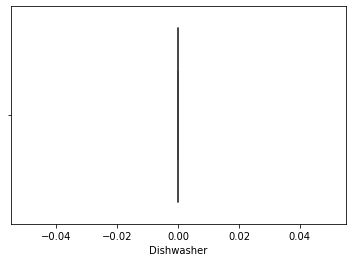

In [44]:
sns.boxplot(model_trimmed['Dishwasher'])

In [45]:
model.columns

Index(['Month', 'Day', 'Hour', 'Minute', 'Fridge-Freezer', 'Washing Machine',
       'Dishwasher', 'Television Site', 'Microwave', 'Toaster', 'Hi-Fi',
       'Kettle', 'Overhead Fan'],
      dtype='object')

In [46]:
x = model_trimmed[['Month', 'Day', 'Hour', 'Minute']]

In [47]:
y = model_trimmed[['Dishwasher']]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=101)

In [49]:
x_train

,Month,Day,Hour,Minute
449823,10,22,10,40
111240,9,25,19,9
205096,2,10,14,5
276064,8,10,3,26
9470,9,18,14,38
...,...,...,...,...
338140,10,13,4,45
146851,9,28,11,45
222984,3,10,23,4
232922,4,10,18,25


<AxesSubplot:>

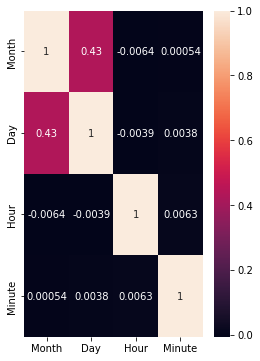

In [50]:
# Create a correlation matrix for the dataframe
corr = x_train.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (4, 6))
sns.heatmap(corr, annot = True)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(x_train,y_train)

LinearRegression()

In [54]:
predictions = lm.predict(x_test)

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


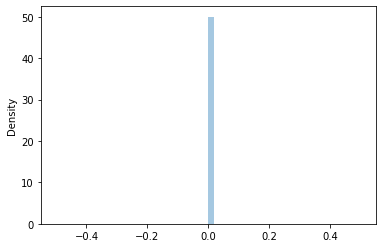

In [55]:
sns.distplot((y_test-predictions),bins=50);

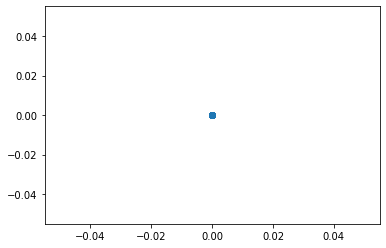

In [56]:
plt.scatter(y_test,predictions)

Text(0.5, 1.0, 'Electricity Consumption for Fridge-Freezer')

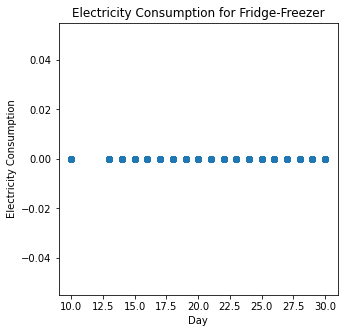

In [57]:
# Visualizing Marketing Spend and Revenue
plt.figure(figsize=(5, 5))

plt.scatter(x_train['Day'], y_train)

plt.xlabel('Day')
plt.ylabel('Electricity Consumption')
plt.title("Electricity Consumption for Fridge-Freezer")

Text(0.5, 1.0, 'Electricity Consumption for Dishwasher')

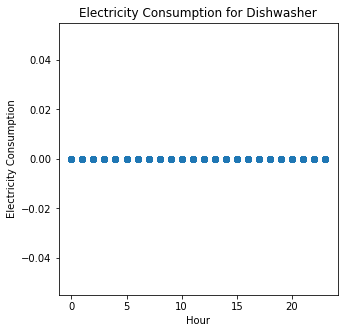

In [58]:
# Visualizing Marketing Spend and Revenue
plt.figure(figsize=(5, 5))

plt.scatter(x_train['Hour'], y_train)

plt.xlabel('Hour')
plt.ylabel('Electricity Consumption')
plt.title("Electricity Consumption for Dishwasher")

Text(0.5, 1.0, 'Electricity Consumption for Fridge-Freezer')

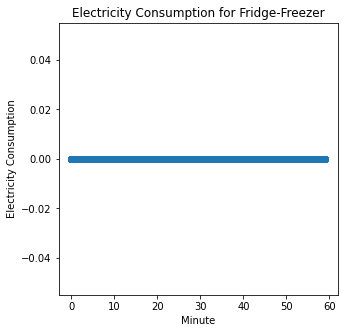

In [59]:
# Visualizing Marketing Spend and Revenue
plt.figure(figsize=(5, 5))

plt.scatter(x_train['Minute'], y_train)

plt.xlabel('Minute')
plt.ylabel('Electricity Consumption')
plt.title("Electricity Consumption for Fridge-Freezer")

Text(0.5, 1.0, 'Electricity Consumption for Dishwashe')

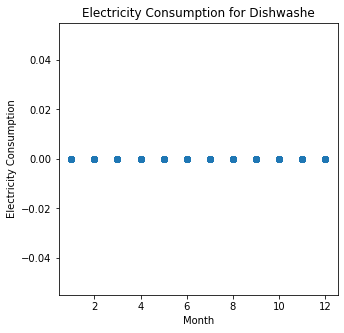

In [60]:
# Visualizing Marketing Spend and Revenue
plt.figure(figsize=(5, 5))

plt.scatter(x_train['Month'], y_train)

plt.xlabel('Month')
plt.ylabel('Electricity Consumption')
plt.title("Electricity Consumption for Dishwashe")

Month     0.0
Day       0.0
Hour      0.0
Minute    0.0
dtype: float64


<AxesSubplot:title={'center':'Top Important Determin Using Decision Tree'}>

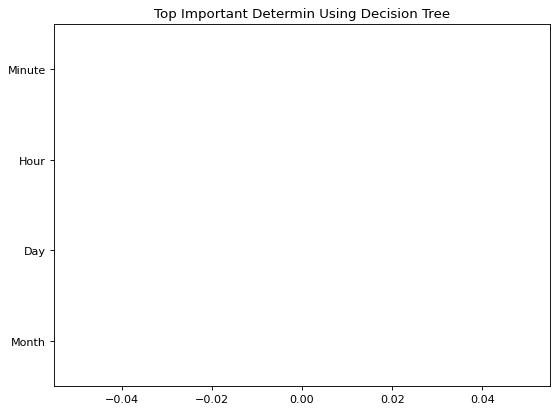

In [61]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = x_train.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Determin Using Decision Tree")

feat_importances = pd.Series(model.feature_importances_, index= x_train.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [62]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [63]:
x_train= scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)  

In [64]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

C:\Users\user\anaconda3\envs\E-commerceApp\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [65]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [66]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [67]:
scaler.scale_

array([ 2.49407358,  6.5053289 ,  6.95059732, 17.318487  ])

In [68]:
scaler.fit(x_train)

StandardScaler()